 # **OPERATIONS ON TABLE USING PANDAS**

In [1]:
import pandas as pd
from urllib.request import urlretrieve  # download the file using the "urlretrieve" function from the "urllib.request" module.


In [2]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1d59e1c50a0>)

In [3]:
#Data from the CSV file is read and stored in a DataFrame object(a data structure in pandas for storing and working with tabular data)
covid_df=pd.read_csv('italy-covid-daywise.csv')

In [4]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [5]:
#describe method presents statistical info
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


**Retrieving data**

In [6]:
#Printing the first 5 rows
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [7]:
#Printing the last 4 rows
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [8]:
#Retrieving data at a particular row or column
covid_df.at[240,'new_deaths']

13.0

In [9]:
#Extracting any no.of particular columns
cases_df=covid_df[['date','new_tests']]
cases_df

,date,new_tests
0,2019-12-31,NaN
1,2020-01-01,NaN
2,2020-01-02,NaN
3,2020-01-03,NaN
4,2020-01-04,NaN
...,...,...
243,2020-08-30,53541.0
244,2020-08-31,42583.0
245,2020-09-01,54395.0
246,2020-09-02,NaN


In [10]:
#Extracting information for a particular row
covid_df.loc[245]

date          2020-09-01
new_cases          996.0
new_deaths           6.0
new_tests        54395.0
Name: 245, dtype: object

In [11]:
#Finding from which row the results in "new_tests" are not null(i.e., data is started capturing from that row)
covid_df.new_tests.first_valid_index()

111

**Analyzing data**

In [12]:
total_cases=covid_df.new_cases.sum()
print('The number of reported cases is {}.'.format(int(total_cases)))

The number of reported cases is 271515.


In [13]:
death_rate=covid_df.new_deaths.sum()/covid_df.new_cases.sum()
print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

The overall reported death rate in Italy is 13.07 %.


**Finding the no.of days where no.of cases is > a particular value

In [14]:
high_new_cases=covid_df.new_cases>1000 
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [15]:
covid_df[high_new_cases]  #Only those rows(i.e.,no.of days) where no.of cases >1000

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


**To view all the rows in a big dataset**

In [16]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [17]:
#To add a new column to the data frame
covid_df['positive_rate']=covid_df.new_cases/covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [19]:
#As the positive_rate column is not that much relevant, so we'll delete that using drop 
covid_df.drop(columns=['positive_rate'],inplace=True)

In [20]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


**Sorting**

In [21]:
#Sorting the column of new_cases in descending order and printing only the 1st 10 rows in that
covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [22]:
#Days with least no.of cases (only the first 10 rows)
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [23]:
#Now let's see the other data before & after that -ve value data ,i.e., "-148.0"
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


**Let's assume it's a data entry error, so we can deal with missing or faulty values like :
1)Replacing it with 0
2)Replacing it with avg of the entire column
3)Replace it with the avg of the values on the previous & next date of the faulty value (interpolation)
4)Discarding the row **

In [28]:
covid_df.at[172,'new_cases']=(covid_df.at[171,'new_cases']+
                              covid_df.at[173,'new_cases'])/2

In [29]:
covid_df.loc[170:174]

,date,new_cases,new_deaths,new_tests
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.5,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0


**Working with Dates**

In [30]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

**The data type of date is currently object, so Pandas does not know that this column is a date.
We can convert it into a datetime column using the pd.to_datetime method.**

In [31]:
covid_df['date']=pd.to_datetime(covid_df.date)

In [32]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [33]:
#Adding new columns in the data frame after extracting from the date
covid_df['year']=pd.DatetimeIndex(covid_df.date).year
covid_df['month']=pd.DatetimeIndex(covid_df.date).month
covid_df['day']=pd.DatetimeIndex(covid_df.date).day
covid_df['weekday']=pd.DatetimeIndex(covid_df.date).weekday

In [34]:
#In weekday '0' is monday & '6' is sunday
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [35]:
#Extracting only those rows for a particular month
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [36]:
#Calculating the total cases,total tests & total deaths for a particular month
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_df_may_metrics

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [37]:
#Combing the above operations
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [39]:
#Grouping the data by (months/year/weekdays/days) and also calculating the (sum/mean/other data) of the 3 columns(tests,cases,deaths)
covid_month_mean_df=covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [40]:
covid_df['total_cases'] = covid_df.new_cases.cumsum() #For calculating the cumulative sum

In [41]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5


**Merging 2 dataframes**

In [42]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1d59f2e5940>)

In [46]:
locations_df=pd.read_csv('locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [47]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [48]:
covid_df['location'] = "Italy"
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy


In [49]:
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [50]:
merged_df['cases_per_million']=merged_df.total_cases*1e6/merged_df.population

In [51]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695


**Writing back the operations done to the csv file**

In [54]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       
                       'new_tests', 
                    
                       'cases_per_million']]
result_df

,date,new_cases,total_cases,new_deaths,new_tests,cases_per_million
0,2019-12-31,0.0,0.0,0.0,NaN,0.000000
1,2020-01-01,0.0,0.0,0.0,NaN,0.000000
2,2020-01-02,0.0,0.0,0.0,NaN,0.000000
3,2020-01-03,0.0,0.0,0.0,NaN,0.000000
4,2020-01-04,0.0,0.0,0.0,NaN,0.000000
...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,53541.0,4420.946386
244,2020-08-31,1365.0,268663.5,4.0,42583.0,4443.522614
245,2020-09-01,996.0,269659.5,6.0,54395.0,4459.995818
246,2020-09-02,975.0,270634.5,8.0,NaN,4476.121695


In [55]:
#Writing back to the csv file
result_df.to_csv('results.csv', index=None)

**Basic plotting with pandas**

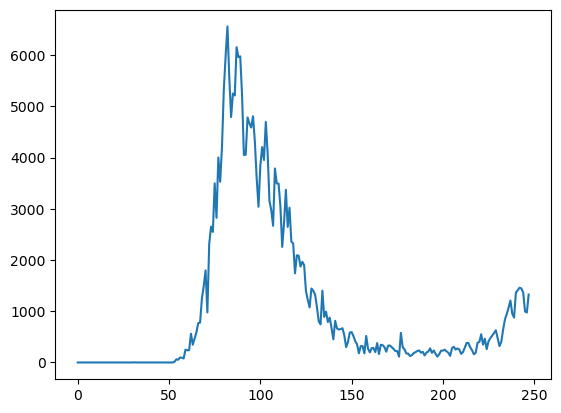

In [56]:
result_df.new_cases.plot();

In [57]:
result_df.set_index('date', inplace=True)
result_df

,new_cases,total_cases,new_deaths,new_tests,cases_per_million
date,,,,,
2019-12-31,0.0,0.0,0.0,NaN,0.000000
2020-01-01,0.0,0.0,0.0,NaN,0.000000
2020-01-02,0.0,0.0,0.0,NaN,0.000000
2020-01-03,0.0,0.0,0.0,NaN,0.000000
2020-01-04,0.0,0.0,0.0,NaN,0.000000
...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,53541.0,4420.946386
2020-08-31,1365.0,268663.5,4.0,42583.0,4443.522614
2020-09-01,996.0,269659.5,6.0,54395.0,4459.995818


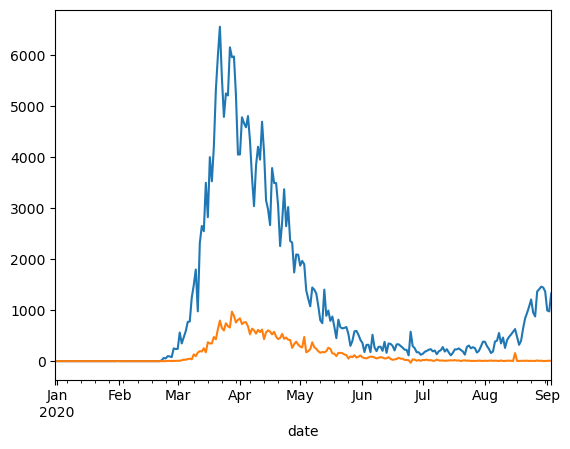

In [58]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

Pandas guide -----> https://pandas.pydata.org/docs/user_guide/index.html